
Sample data analysis and predictive modeling of flight price prediction for **Fly.me**

In [232]:
##sample dataset is stored in google drive ##

# to mount drive in google colaboratory environment #
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## required libraries

import pandas as pd                 # for statistical analysis
import numpy as np                  # for mathematical operations
import seaborn as sns               # for visualization
import matplotlib.pyplot as plt     ################

## Data Collection


Data is generated every 5 minutes approx in form of xml file, xml file has tree like structure and cannot be used directly for data analysis and predictive modeling. So to get data in form of csv/excel sheet, we have a xml parser **[script](https://github.com/raheel-dev/Fly.me-Data-Analysis-Predictive-modeling/blob/master/XML%20Parser/xml2csvV1.ipynb)** written in python using 'lxml library', sample dataset consist of 3 GB, extracted records are more 153k+ and 34 columns.

In [234]:
## reading dataset from directory
df = pd.read_csv('/content/drive/My Drive/sabre-ingest/sabre_ingest_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [235]:
type(df)

pandas.core.frame.DataFrame

In [0]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153507 entries, 0 to 153506
Data columns (total 34 columns):
schedule_id                      153507 non-null int64
stops                            153507 non-null int64
eticketable                      153507 non-null bool
departure_airport                153507 non-null object
departure_city                   153507 non-null object
departure_time                   153507 non-null object
departure_timezoneOffset         153507 non-null object
arrival_aiport                   153507 non-null object
arrival_city                     153507 non-null object
arrival_time                     153507 non-null object
arrival_dateAdjustment           153507 non-null int64
arrival_timezoneOffset           153507 non-null object
carrier_marketing                153507 non-null object
carrier_operating                153507 non-null object
carrier_codeShared               25714 non-null object
carrier_operatingFlightNumber    153507 non-null int64


So data have more than 153k records and 34 columns, by looking at the entries it looks like that there are null values in 'carrier_codeShared, 'departure and return dates'.

**Note**: departure and return dates are not extracted fully yet so this is partial analysis

In [238]:
## print first 10 records of data head to see what data looks like ##
df.head(10)

,schedule_id,stops,eticketable,departure_airport,departure_city,departure_time,departure_timezoneOffset,arrival_aiport,arrival_city,arrival_time,arrival_dateAdjustment,arrival_timezoneOffset,carrier_marketing,carrier_operating,carrier_codeShared,carrier_operatingFlightNumber,carrier_marketingFlightNumber,equipment_code,equipment_change,pricing_subSource,PoSCountryCode,passenger_group,passenger_type,passenger_number,passenger_nonRefundable,total_price,total_taxes,currency,departure_date,return_date,booking_code,cabin_code,seats_available,availablity_break
0,1,0,True,DEN,DEN,23:45:00,07:00,EWR,QYC,05:19:00,1,05:00,UA,UA,NaN,329,329,739,False,BCH,US,0,ADT,1,True,249.3,52.09,USD,2019-11-24,2019-12-08,N,Y,9,False
1,2,0,True,EWR,QYC,07:30:00,05:00,BOS,BOS,08:39:00,0,05:00,UA,UA,NaN,2320,2320,739,False,BCH,US,0,ADT,1,True,249.3,52.09,USD,2020-08-25,2020-08-31,N,Y,9,False
2,3,0,True,BOS,BOS,09:45:00,05:00,DEN,DEN,12:28:00,0,07:00,UA,UA,NaN,416,416,739,False,BCH,US,0,ADT,1,True,249.3,52.09,USD,2019-10-24,2019-10-27,N,Y,9,False
3,4,0,True,EWR,QYC,06:30:00,05:00,BOS,BOS,07:39:00,0,05:00,UA,UA,NaN,416,416,73G,False,BCH,US,0,ADT,1,True,249.3,52.09,USD,2019-11-11,2019-11-11,N,Y,9,False
4,5,0,True,BOS,BOS,11:45:00,05:00,DEN,DEN,14:21:00,0,07:00,UA,UA,NaN,652,652,753,False,BCH,US,0,ADT,1,True,253.5,56.29,USD,2019-12-04,2020-01-06,N,Y,9,False
5,6,1,True,BOS,BOS,08:33:00,05:00,DEN,DEN,14:29:00,0,07:00,UA,UA,NaN,775,775,738,False,BCH,US,0,ADT,1,True,253.5,56.29,USD,2019-12-23,2019-12-28,N,Y,9,False
6,7,0,True,BOS,BOS,08:33:00,05:00,ORD,CHI,10:25:00,0,06:00,UA,UA,NaN,775,775,738,False,BCH,US,0,ADT,1,True,258.0,60.79,USD,2019-11-08,2019-11-11,N,Y,9,False
7,8,0,True,ORD,CHI,11:25:00,06:00,DEN,DEN,13:05:00,0,07:00,UA,UA,NaN,2314,2314,739,False,BCH,US,0,ADT,1,True,258.0,60.79,USD,2020-02-19,2020-03-05,N,Y,9,False
8,9,0,True,BOS,BOS,18:00:00,05:00,EWR,QYC,19:44:00,0,05:00,UA,UA,NaN,1202,1202,320,False,BCH,US,0,ADT,1,True,258.0,60.79,USD,2019-12-25,2019-12-28,N,Y,9,False
9,10,0,True,EWR,QYC,20:30:00,05:00,DEN,DEN,22:58:00,0,07:00,UA,UA,NaN,2217,2217,739,False,BCH,US,0,ADT,1,True,258.0,60.79,USD,2019-11-01,2019-11-15,N,Y,9,False


In [239]:
## stops have no null values,
## most of the values are of zeros and least values are of 2

df['stops'].value_counts()

0    152411
1      1082
2        14
Name: stops, dtype: int64

In [240]:
## no null value and just 9 False and remaining are true

df['eticketable'].value_counts()

True     153498
False         9
Name: eticketable, dtype: int64

In [241]:
## no null value
## most of the airports from where flights arrived and least ones as well
df['arrival_aiport'].value_counts()

LAX    13094
ORD     7804
BOS     7308
DFW     6701
ATL     6359
       ...  
PCT        1
OLM        1
CUR        1
LKP        1
RKD        1
Name: arrival_aiport, Length: 678, dtype: int64




Most of the flights are destined to these airports

- QYC  ()
- LAX  (LOS ANGELES INTERNATIONAL AIRPORT)
- CHI  ()
- BOS  (LOGAN INTERNATIONAL AIRPORT)
- QDF

and least of flights are destined to these airports

- STR  ()
- DOV  ()
- VCE  ()
- CUR  ()
- BLM  ()

In [242]:
df['arrival_city'].value_counts()

QYC    11970
LAX    11575
CHI     7812
BOS     7329
QDF     6665
       ...  
STR        1
DOV        1
VCE        1
CUR        1
BLM        1
Name: arrival_city, Length: 604, dtype: int64

In [0]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'])
df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_minute'] = df['arrival_time'].dt.minute

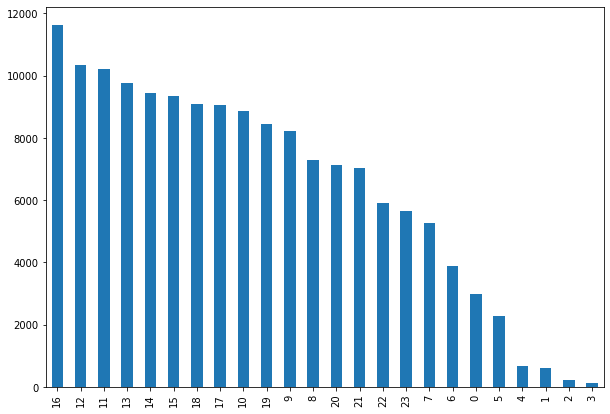

In [244]:
plt.figure(figsize = (10, 7))
df['arrival_hour'].value_counts().plot(kind = 'bar')
plt.show()

From figure it looks like that most of the flights arrived at the destination airports as:

- there is less arrival flights from midnight to about 7 AM
- the highest traffic is between 10:00 to 19:00

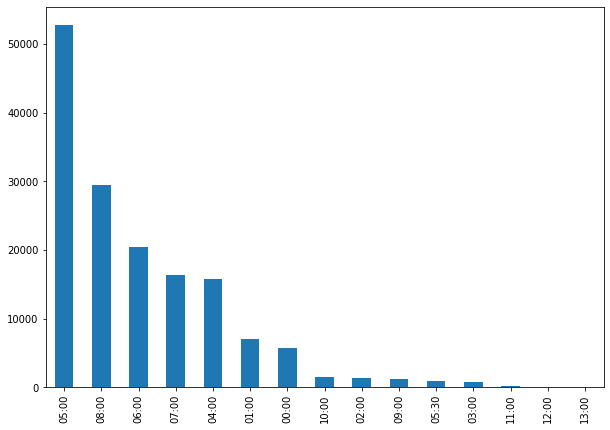

In [245]:
plt.figure(figsize = (10, 7))
df['arrival_timezoneOffset'].value_counts().plot(kind = 'bar')
plt.show()

In [246]:
df['departure_airport'].value_counts()

LAX    12406
BOS     8110
ORD     7777
DFW     6595
ATL     6396
       ...  
CUR        1
PRG        1
ZPH        1
PWK        1
LAL        1
Name: departure_airport, Length: 676, dtype: int64




Most of the flights are departed from these airports

- LAX  (LOS ANGELES INTERNATIONAL AIRPORT)
- BOS  (LOGAN INTERNATIONAL AIRPORT)
- ORD
- DFW
- ATL

and least of flights are departed from these airports

- CUR  ()
- PRG  ()
- ZPH  ()
- PWK  ()
- LAL  ()

In [247]:
df['departure_city'].value_counts()

QYC    12059
LAX    10949
BOS     8134
CHI     7788
QDF     6557
       ...  
HRO        1
PRG        1
LAL        1
RKD        1
LBB        1
Name: departure_city, Length: 604, dtype: int64

In [0]:
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['departure_hour'] = df['departure_time'].dt.hour
df['departure_minute'] = df['departure_time'].dt.minute

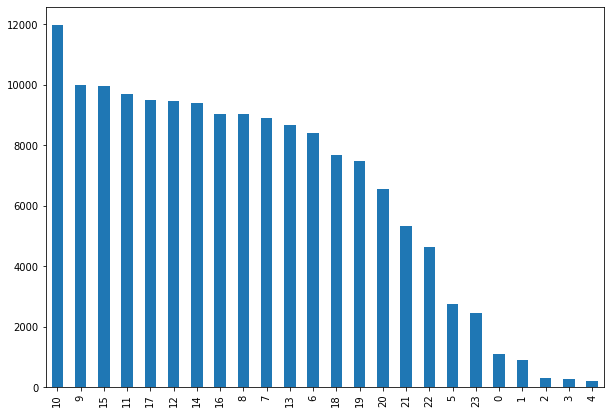

In [249]:
plt.figure(figsize = (10, 7))
df['departure_hour'].value_counts().plot(kind = 'bar')
plt.show()

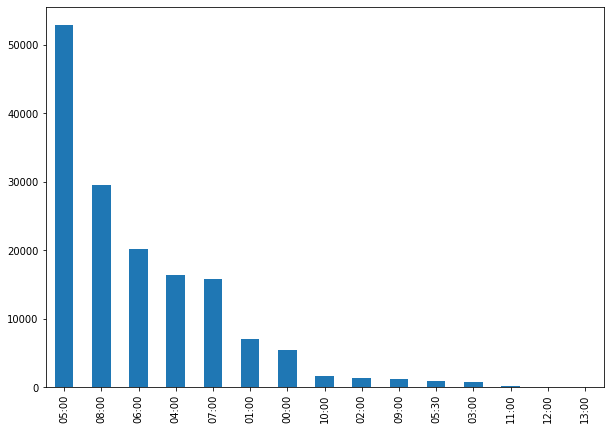

In [250]:
plt.figure(figsize = (10, 7))
df['departure_timezoneOffset'].value_counts().plot(kind = 'bar')
plt.show()

In [251]:
df['carrier_marketing'].value_counts()

AA    37673
UA    23967
DL    15170
AS    11879
O2     9588
      ...  
TA        1
7C        1
B7        1
JQ        1
EW        1
Name: carrier_marketing, Length: 114, dtype: int64

In [252]:
df['carrier_operating'].value_counts()

AA    40340
UA    24550
DL    17287
AS    11400
O2     9588
      ...  
TA        1
7C        1
B7        1
LJ        1
OD        1
Name: carrier_operating, Length: 152, dtype: int64

In [253]:
print(df['carrier_codeShared'].value_counts())
print()
print('Null values: ', df['carrier_codeShared'].isna().sum())

AIRLINE 8ZMA365P AS LINEAR AIR TAXI       3280
/HORIZON AIR AS ALASKAHORIZON             1570
/SKYWEST DBA UNITED EXPRESS               1236
REPUBLIC AIRWAYS AS AMERICAN EAGLE        1196
/REPUBLIC AIRLINES DBA UNITED EXPRESS     1129
                                          ... 
/CITYHOPPER                                  1
/LGW LUFTFAHRTGES WALTER FOR EUROWINGS       1
AIRLINE IICA001F AS LINEAR AIR TAXI          1
AIRLINE OW6A318J AS LINEAR AIR TAXI          1
AIRLINE IKJA031F AS LINEAR AIR TAXI          1
Name: carrier_codeShared, Length: 255, dtype: int64

Null values:  127793


In [254]:
df['carrier_marketingFlightNumber'].value_counts()

403     183
775     181
7       180
6       176
770     176
       ... 
3340      1
5835      1
4518      1
8480      1
3382      1
Name: carrier_marketingFlightNumber, Length: 8187, dtype: int64

In [255]:
df['carrier_operatingFlightNumber'].value_counts()

69      231
7       220
106     218
6       208
66      200
       ... 
4844      1
6327      1
8775      1
6367      1
2837      1
Name: carrier_operatingFlightNumber, Length: 6599, dtype: int64

In [256]:
df['pricing_subSource'].value_counts()

MIP     120825
BCH      30832
HPIS      1850
Name: pricing_subSource, dtype: int64

In [257]:
df['passenger_group'].value_counts()

0    153478
1        29
Name: passenger_group, dtype: int64

In [258]:
df['passenger_nonRefundable'].value_counts()

True     136571
False     16936
Name: passenger_nonRefundable, dtype: int64

In [259]:
df['total_price'].value_counts()

6751.32    941
6755.82    742
136.59     519
228.00     397
225.30     389
          ... 
507.97       1
1286.35      1
759.14       1
1400.26      1
661.30       1
Name: total_price, Length: 20164, dtype: int64

In [260]:
df['total_taxes'].value_counts()

9.00      2602
18.00     2094
13.50     2037
278.85    1349
66.40      721
          ... 
96.89        1
488.35       1
132.24       1
769.05       1
457.43       1
Name: total_taxes, Length: 8870, dtype: int64

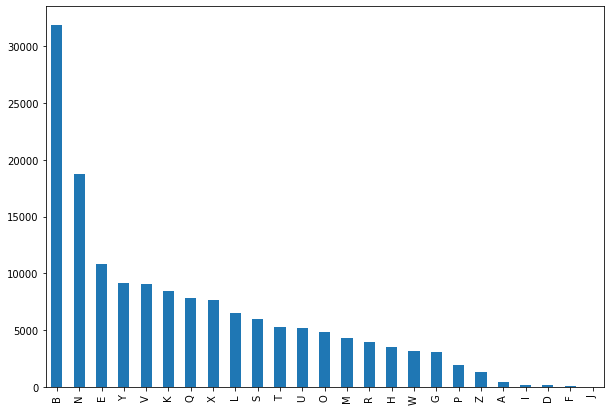

In [261]:
plt.figure(figsize = (10, 7))
df['booking_code'].value_counts().plot(kind = 'bar')
plt.show()

In [262]:
df['cabin_code'].value_counts()

Y    153029
S       291
C       105
F        82
Name: cabin_code, dtype: int64

In [263]:
df['seats_available'].value_counts()

9    92521
7    24149
4    16475
1     4692
2     4323
3     3529
6     2976
5     2728
8     2111
0        3
Name: seats_available, dtype: int64

In [264]:
df['availablity_break'].value_counts()

False    89536
True     63971
Name: availablity_break, dtype: int64

In [265]:
df.isna().sum()

schedule_id                           0
stops                                 0
eticketable                           0
departure_airport                     0
departure_city                        0
departure_time                        0
departure_timezoneOffset              0
arrival_aiport                        0
arrival_city                          0
arrival_time                          0
arrival_dateAdjustment                0
arrival_timezoneOffset                0
carrier_marketing                     0
carrier_operating                     0
carrier_codeShared               127793
carrier_operatingFlightNumber         0
carrier_marketingFlightNumber         0
equipment_code                        0
equipment_change                      0
pricing_subSource                     0
PoSCountryCode                        0
passenger_group                       0
passenger_type                        0
passenger_number                      0
passenger_nonRefundable               0


In [266]:
df.describe()

,schedule_id,stops,arrival_dateAdjustment,carrier_operatingFlightNumber,carrier_marketingFlightNumber,passenger_group,passenger_number,total_price,total_taxes,seats_available,arrival_hour,arrival_minute,departure_hour,departure_minute
count,153507.000000,153507.000000,153507.000000,153507.000000,153507.000000,153507.000000,153507.0,153507.000000,153507.000000,153507.000000,153507.000000,153507.000000,153507.000000,153507.000000
mean,46.935710,0.007231,0.102262,1696.824972,2160.695395,0.000189,1.0,1277.186799,179.200249,7.425987,13.985343,29.395819,13.102184,26.313367
std,37.639566,0.085797,0.315259,1654.778010,2094.306447,0.013743,0.0,15674.608653,1954.330290,2.339391,5.218808,17.520490,5.013497,18.033036
min,1.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.0,66.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,515.000000,653.000000,0.000000,1.0,292.580000,55.420000,7.000000,10.000000,15.000000,9.000000,10.000000
50%,39.000000,0.000000,0.000000,1269.000000,1615.000000,0.000000,1.0,460.990000,69.150000,9.000000,14.000000,30.000000,13.000000,27.000000
75%,67.000000,0.000000,0.000000,2239.000000,2625.000000,0.000000,1.0,747.560000,151.150000,9.000000,18.000000,45.000000,17.000000,40.000000
max,388.000000,2.000000,2.000000,9819.000000,9977.000000,1.000000,1.0,960000.000000,121200.000000,9.000000,23.000000,59.000000,23.000000,59.000000


From above statistics of price, the minimum price of the ticket is $66 and maximum value is 960000

so there may be oultiers as well and data is not distrubted normally, now to see let's plot

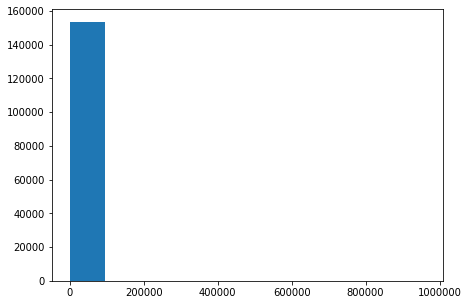

In [267]:
plt.figure(figsize = (7, 5))
plt.hist(df['total_price'].values, bins = 10)
plt.show()

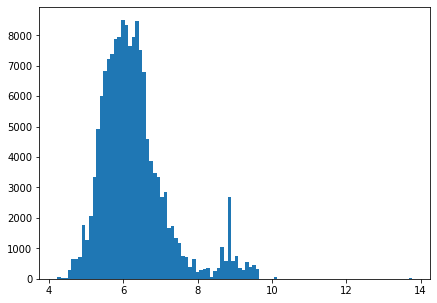

In [268]:
plt.figure(figsize = (7, 5))
df['log_price'] = np.log(df['total_price'].values + 1)
plt.hist(df['log_price'].values, bins=100)
plt.show()